<a href="https://colab.research.google.com/github/Pandatoey/LAB229351/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_229351_LAB09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook หรือไฟล์ *.ipynb ที่กำหนดให้ จากนั้นบันทึกไว้เป็นไฟล์ *.pdf แล้วส่งใน Assignments

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/elecequip.csv

In [1]:
# uploading the csv file to colab

!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2025-09-17 12:57:01--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-09-17 12:57:01 (48.6 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [2]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('elecequip.csv', parse_dates=['time'], #คอลัมชื่อไหนที่เก็บวันที่ของเรา
                                        index_col='time', #คอลัมแรกที่ใช้อินเด็ซข้อมูลของเรา เช่นเวลา
                                        date_format='%Y-%m') #บอกเวลาของเราว่าหน้าตาเป็นยังไง ว/ด หรือ วดป

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


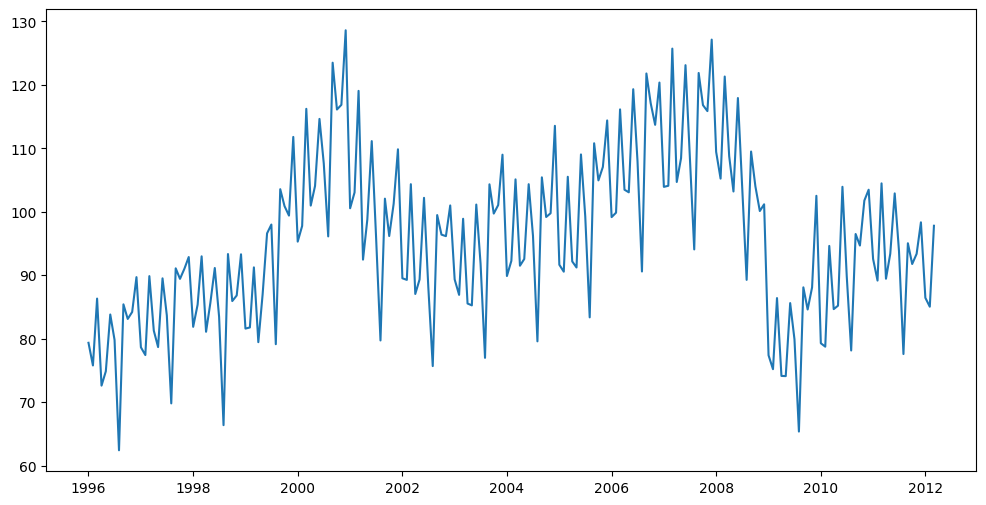

In [4]:
plt.figure(figsize=(12,6))
plt.plot(data["value"]); #แกนนอนคืออินเด้ก

In [5]:
# subsetting data at specified date

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [6]:
data.loc['1996-01-01']

,1996-01-01
Unnamed: 0,1.00
value,79.35


In [7]:
# Add or change values

data.loc['2012-03-02','value'] = 86.45

data

,Unnamed: 0,value
time,,
1996-01-01,1.0,79.35
1996-02-01,2.0,75.78
1996-03-01,3.0,86.32
1996-04-01,4.0,72.60
1996-05-01,5.0,74.86
...,...,...
2011-12-01,192.0,98.34
2012-01-01,193.0,86.44
2012-02-01,194.0,85.04


# Moving average

In [8]:
data['MA'] = data['value'].rolling(window=5,center=True).mean()
#data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)

data.head(12)

,Unnamed: 0,value,MA
time,,,
1996-01-01,1.0,79.35,NaN
1996-02-01,2.0,75.78,NaN
1996-03-01,3.0,86.32,77.782
1996-04-01,4.0,72.60,78.674
1996-05-01,5.0,74.86,79.478
1996-06-01,6.0,83.81,74.696
1996-07-01,7.0,79.80,77.258
1996-08-01,8.0,62.41,78.908
1996-09-01,9.0,85.41,78.988


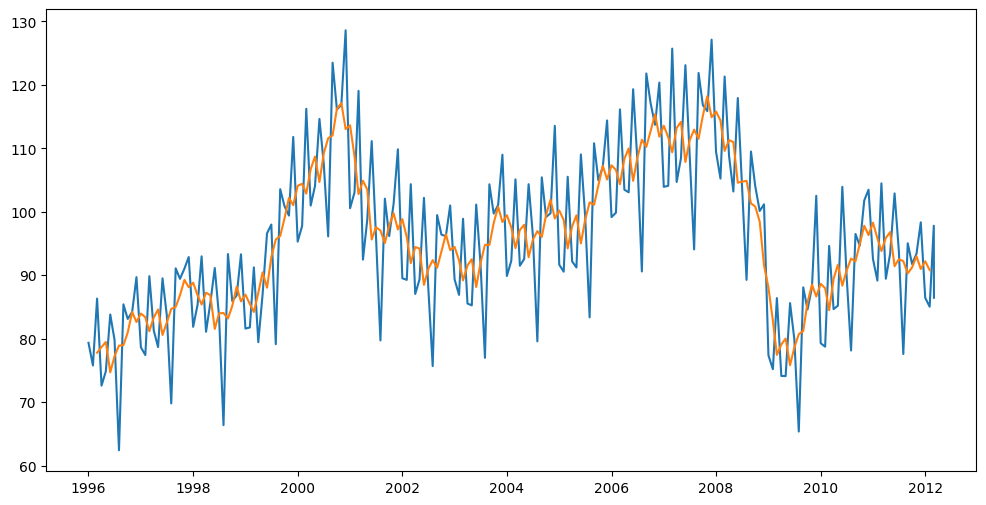

In [9]:
plt.figure(figsize=(12,6))
plt.plot(data['value'])
plt.plot(data['MA']);

# Classical decomposition

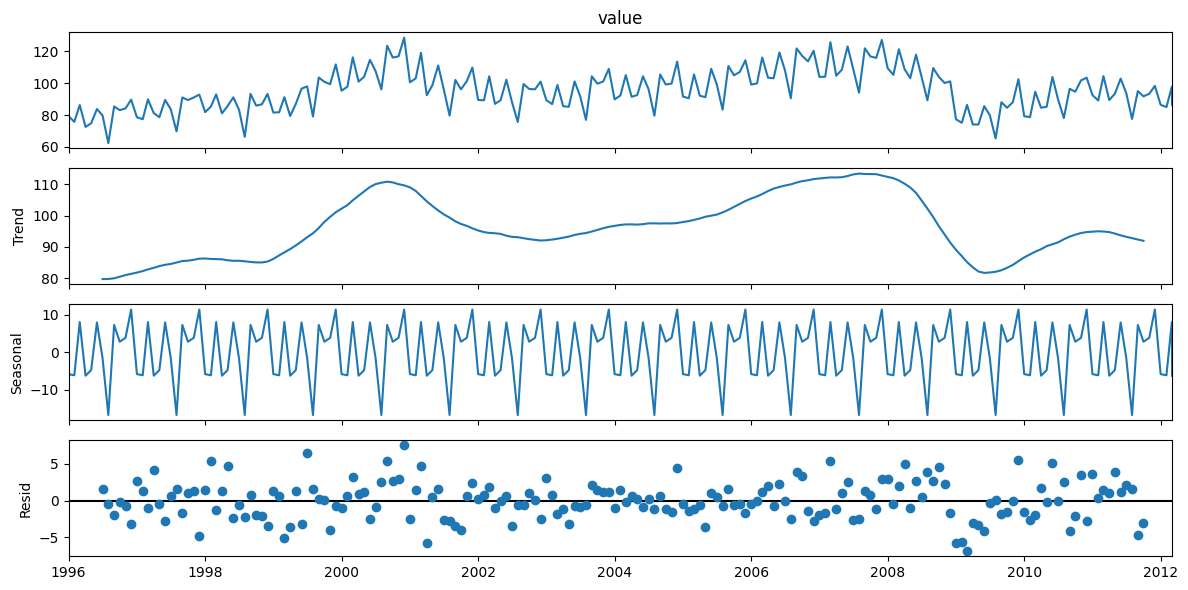

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(data['value'], model='additive',period=12)

result_add.plot();

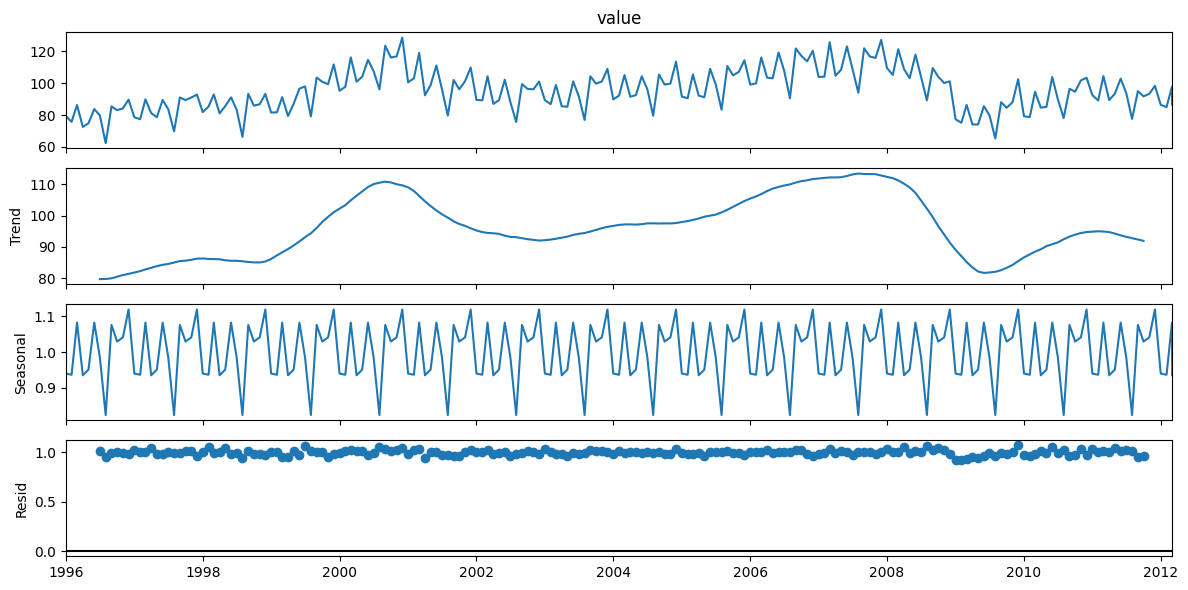

In [11]:
result_mul = seasonal_decompose(data['value'], model='multiplicative',period=12)

result_mul.plot();

### เรียกดูแต่ละส่วน

In [12]:
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-03-02   NaN
Name: trend, Length: 196, dtype: float64
time
1996-01-01    -5.870845
1996-02-01    -6.182456
1996-03-01     8.099989
1996-04-01    -6.298150
1996-05-01    -4.801650
                ...    
2011-12-01    11.464322
2012-01-01    -5.870845
2012-02-01    -6.182456
2012-03-01     8.099989
2012-03-02    -6.298150
Name: seasonal, Length: 196, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-03-02   NaN
Name: resid, Length: 196, dtype: float64
time
1996-01-01    79.35
1996-02-01    75.78
1996-03-01    86.32
1996-04-01    72.60
1996-05-01    74.86
              ...  
2011-12-01    98.34
2012-01-01    86.44
2012-02-01    85.04
2012-03-01    97.80
2012-03-02    86

### ปฏิบัติการครั้งที่ 7
1. สร้างโมเดลเพื่อการทำนายดังนี้
1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-03-01  
1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set
1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01  
3. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง
4. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

In [61]:
# 1.
train = data.loc['1996-01-01':'2009-12-01','value']
test = data.loc['2010-01-01':'2012-03-01', 'value']

In [62]:
print(train)
print(test)

time
1996-01-01     79.35
1996-02-01     75.78
1996-03-01     86.32
1996-04-01     72.60
1996-05-01     74.86
               ...  
2009-08-01     65.36
2009-09-01     88.09
2009-10-01     84.60
2009-11-01     88.09
2009-12-01    102.52
Name: value, Length: 168, dtype: float64
time
2010-01-01     79.28
2010-02-01     78.74
2010-03-01     94.62
2010-04-01     84.66
2010-05-01     85.20
2010-06-01    103.94
2010-07-01     89.87
2010-08-01     78.14
2010-09-01     96.50
2010-10-01     94.68
2010-11-01    101.77
2010-12-01    103.48
2011-01-01     92.57
2011-02-01     89.16
2011-03-01    104.48
2011-04-01     89.45
2011-05-01     93.40
2011-06-01    102.90
2011-07-01     93.77
2011-08-01     77.58
2011-09-01     95.04
2011-10-01     91.77
2011-11-01     93.37
2011-12-01     98.34
2012-01-01     86.44
2012-02-01     85.04
2012-03-01     97.80
Name: value, dtype: float64


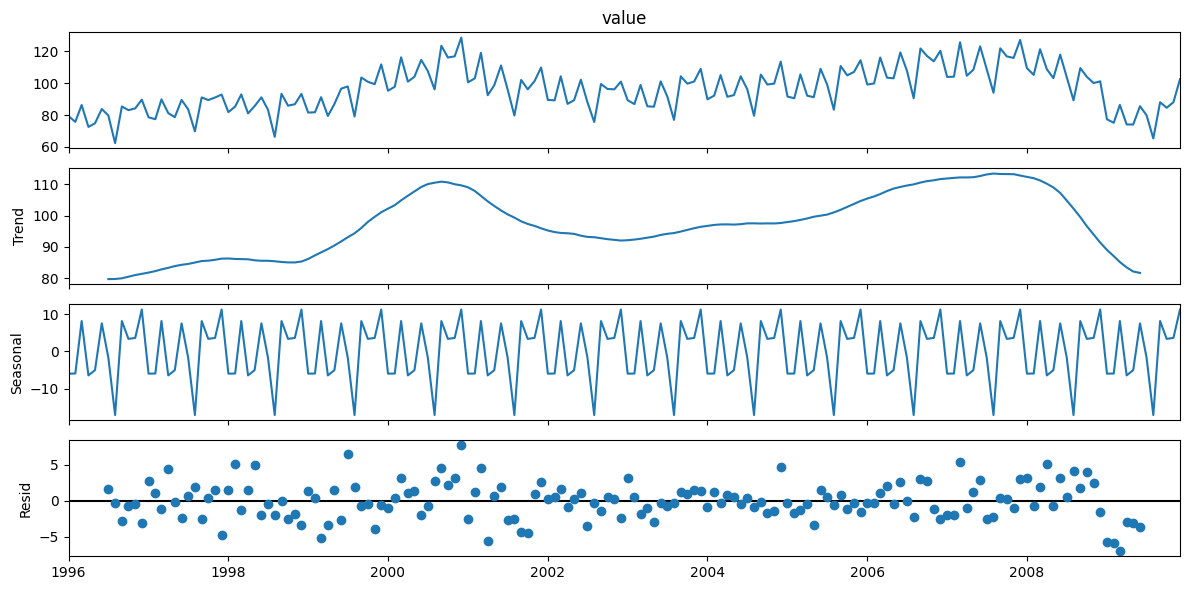

In [63]:
mpl.rc("figure", figsize=(12,6))
resultadd = seasonal_decompose(train, model='additive',period=12)
resultadd.plot();

In [66]:
print(resultadd.trend)
print(resultadd.seasonal)
print(resultadd.resid)
print(resultadd.observed)

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2009-08-01   NaN
2009-09-01   NaN
2009-10-01   NaN
2009-11-01   NaN
2009-12-01   NaN
Name: trend, Length: 168, dtype: float64
time
1996-01-01    -5.985857
1996-02-01    -5.957941
1996-03-01     8.183245
1996-04-01    -6.462428
1996-05-01    -5.041178
                ...    
2009-08-01   -17.138902
2009-09-01     8.178886
2009-10-01     3.378341
2009-11-01     3.644335
2009-12-01    11.289463
Name: seasonal, Length: 168, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2009-08-01   NaN
2009-09-01   NaN
2009-10-01   NaN
2009-11-01   NaN
2009-12-01   NaN
Name: resid, Length: 168, dtype: float64
time
1996-01-01     79.35
1996-02-01     75.78
1996-03-01     86.32
1996-04-01     72.60
1996-05-01     74.86
               ...  
2009-08-01     65.36
2009-09-01     88.09
2009-10-01     84.60
2009-11-01     88.09
2009-1

In [69]:
y_true = test

In [71]:
T_train = resultadd.trend
S_train = resultadd.seasonal
R_train = resultadd.resid

In [72]:
seasonal_moy = S_train.groupby(S_train.index.month).mean()
S_test = test.index.to_series().map(lambda d: seasonal_moy[d.month])
S_test.index = test.index

In [73]:
TR_last = (T_train + R_train).dropna().iloc[-1]

In [74]:
y_pred = S_test + TR_last

In [79]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [80]:
rmse_value = rmse(y_true,y_pred)
print(rmse_value)

14.589766942508222


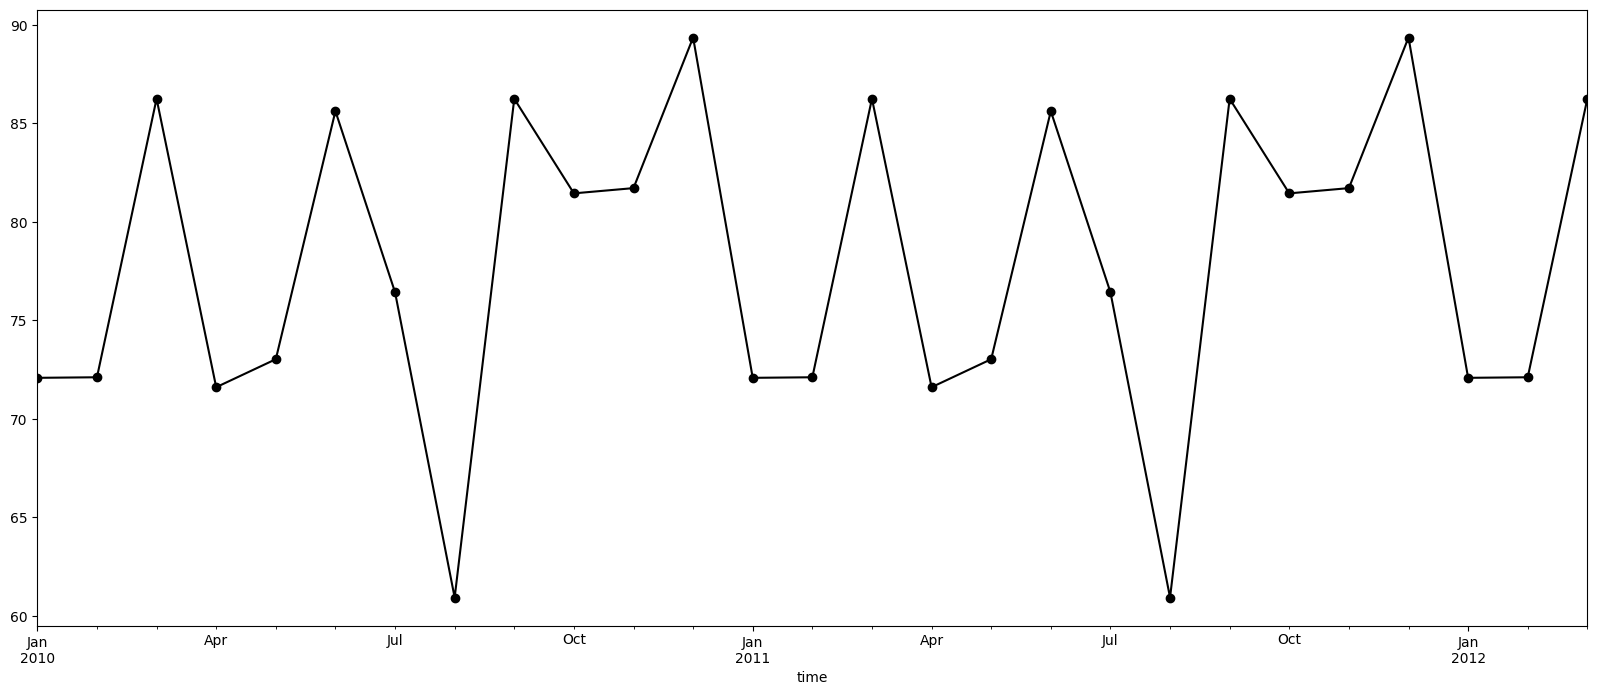

In [87]:
ax = y_pred.plot(marker='o', color='black', figsize=(20,8))

/tmp/ipython-input-1248720333.py:15: UserWarning: Glyph 3606 (\N{THAI CHARACTER THO THUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1248720333.py:15: UserWarning: Glyph 3638 (\N{THAI CHARACTER SARA UE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1248720333.py:15: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3606 (\N{THAI CHARACTER THO THUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3638 (\N{THAI CHARACTER SARA UE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) missing from font(s) DejaVu Sans.


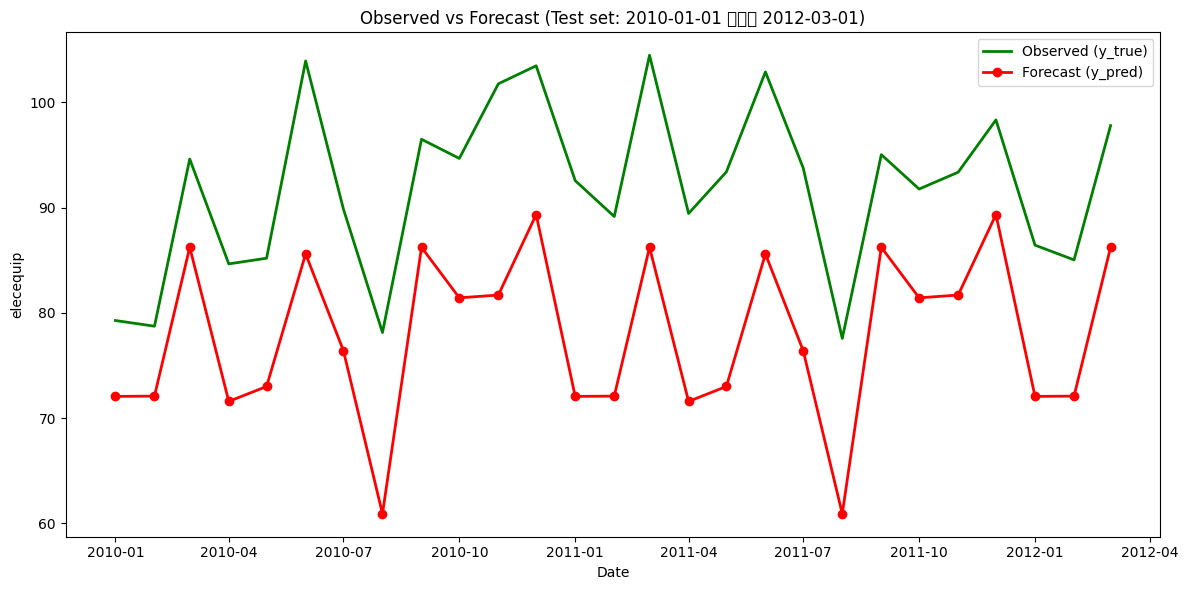

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# ข้อมูลจริงช่วง test
plt.plot(test.index, test, label="Observed (y_true)", color="green", linewidth=2)

# ค่าทำนายช่วง test
plt.plot(y_pred.index, y_pred, label="Forecast (y_pred)", color="red", linewidth=2, marker='o')

plt.title("Observed vs Forecast (Test set: 2010-01-01 ถึง 2012-03-01)")
plt.xlabel("Date")
plt.ylabel("elecequip")
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-2174669689.py:13: UserWarning: Glyph 3586 (\N{THAI CHARACTER KHO KHAI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2174669689.py:13: UserWarning: Glyph 3657 (\N{THAI CHARACTER MAI THO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2174669689.py:13: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2174669689.py:13: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2174669689.py:13: UserWarning: Glyph 3641 (\N{THAI CHARACTER SARA UU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2174669689.py:13: UserWarning: Glyph 3621 (\N{THAI CHARACTER LO LING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2174669689.py:13: UserWarning: Glyph 3649 (\N{THAI CHARACTER SARA AE}) missing from font(s) DejaVu Sans.
  plt.tig

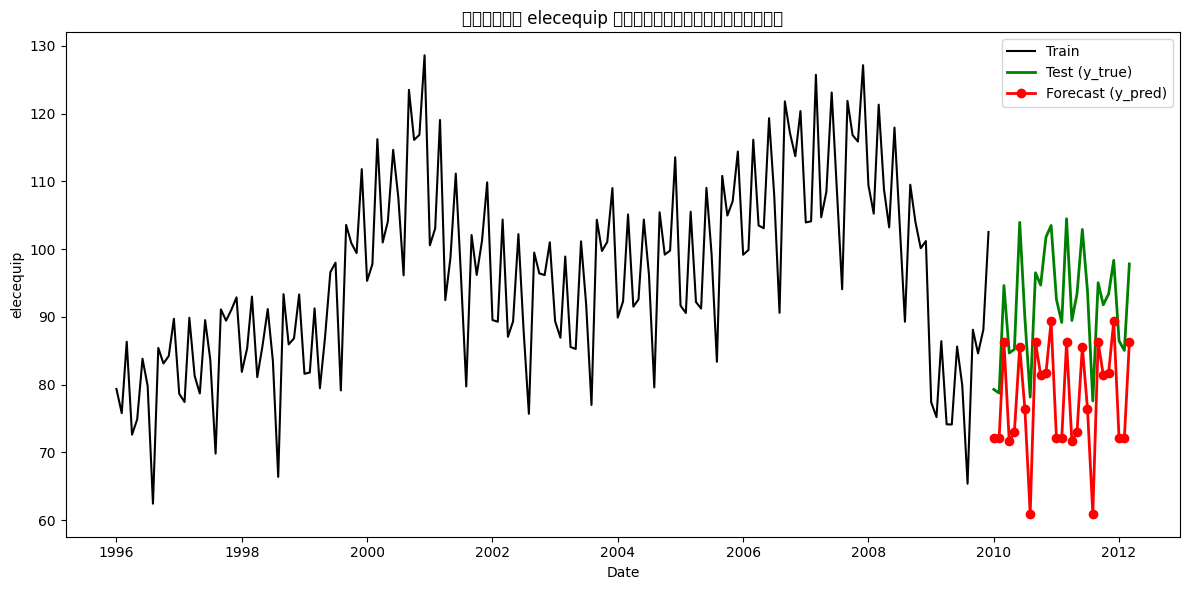

In [91]:
# ข้อมูล training
plt.plot(train, label="Train", color="black")

# ข้อมูล test
plt.plot(test, label="Test (y_true)", color="green", linewidth=2)

plt.plot(y_pred, label="Forecast (y_pred)", color="red", linewidth=2, marker='o')

plt.title("ข้อมูล elecequip และค่าทำนายที่ได้")
plt.xlabel("Date")
plt.ylabel("elecequip")
plt.legend()
plt.tight_layout()
plt.show()